In [8]:
import pandas as pd

df = pd.read_csv("../data/violations.csv")
df.describe(include='all')

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
count,24340,24340,24340,24340,0.0,24118,24340,4998,24340,24152,...,24340,24263,4334,24275,24271,24251,24340.000000,24340.000000,24340.000000,24340
unique,17950,17940,2,586,NaN,492,1452,810,1978,38,...,23,13143,2094,1076,124,1576,NaN,NaN,NaN,11395
top,HVIOL-650250,2022-12-14 14:57:06,Closed,105.1,NaN,Failure to Obtain Permit,9,,Washington,ST,...,14,546 East Broadway,Unit 1,Boston,MA,02128,NaN,NaN,NaN,"(42.26731000042018, -71.10906000146936)"
freq,36,36,17801,3431,NaN,3431,394,1208,588,17289,...,2360,77,143,2442,21878,1672,NaN,NaN,NaN,47
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,141599.583155,42.321076,-71.082249,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101801.421976,0.033561,0.032181,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,42.232100,-71.181830,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63883.500000,42.295070,-71.097500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,118380.000000,42.318820,-71.078661,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,199384.000000,42.348986,-71.061391,NaN


In [4]:
# Check for duplicate data points
duplicates = df.duplicated()
duplicates = duplicates[duplicates == True]
len(duplicates)

1714

In [9]:
# Hard-Coded Dictionary of hazardous conditions + violation codes
violations = {"Hot Water": "410.190", "Potable Water": "410.180", "Heating Facilities Required": "410.200", "Temperature Requirements": "410.201",
              "Asbestos Material": "410.353", "Use of Lead Paint Prohibited": "410.502", "Safe Condition": "410.452",
              "Smoke Detectors and Carbon Monoxide Alarms": "410.482"}

In [10]:


#Convert to lower case and remove whitespace so that we don't get duplicates
df['contact_addr1'] = df['contact_addr1'].apply(lambda x : str(x).lower())
df['contact_city'] = df['contact_city'].apply(lambda x : str(x).lower().replace(' ', ''))
#df.columns = df.columns.str.replace(' ', '')


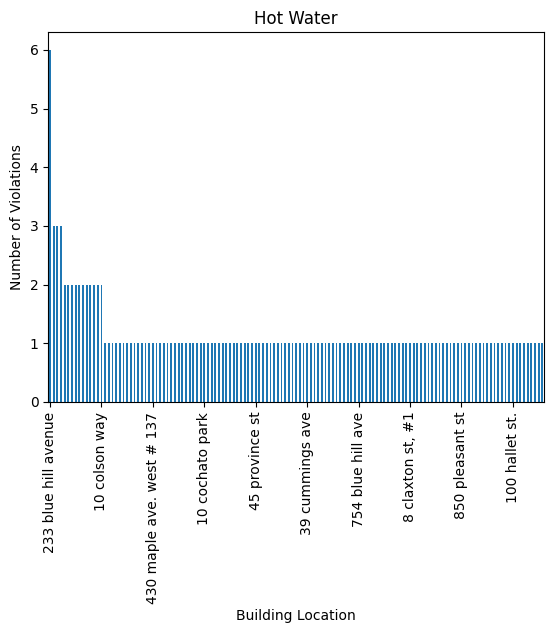

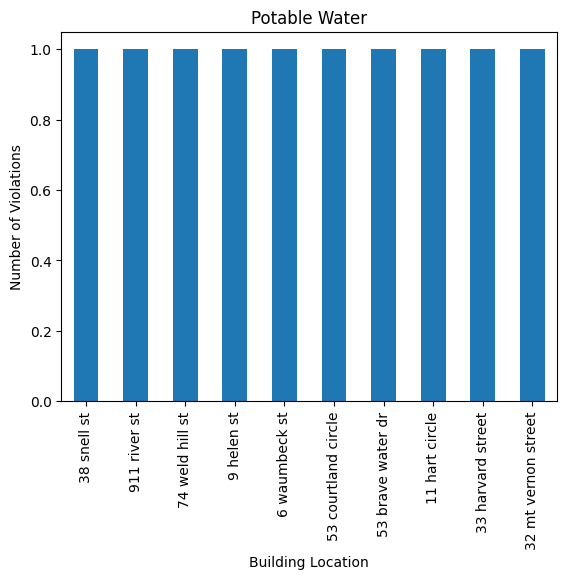

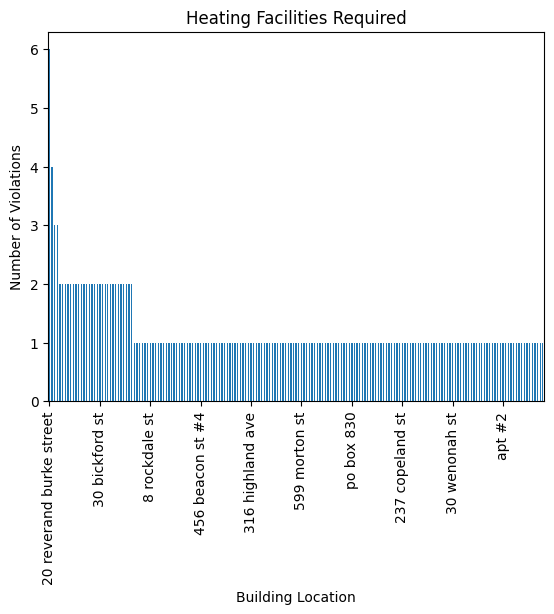

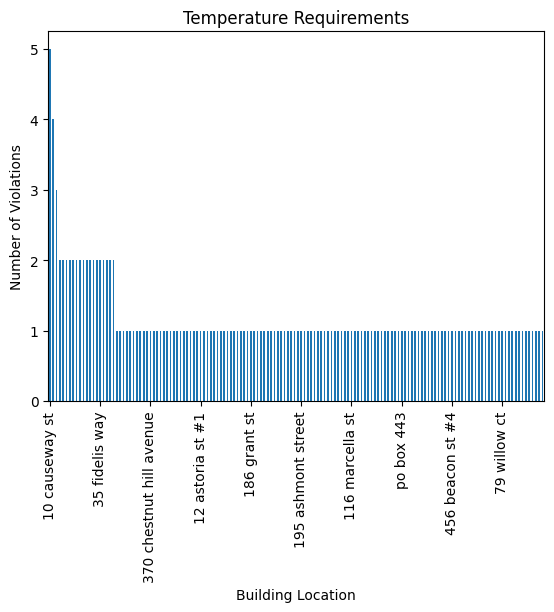

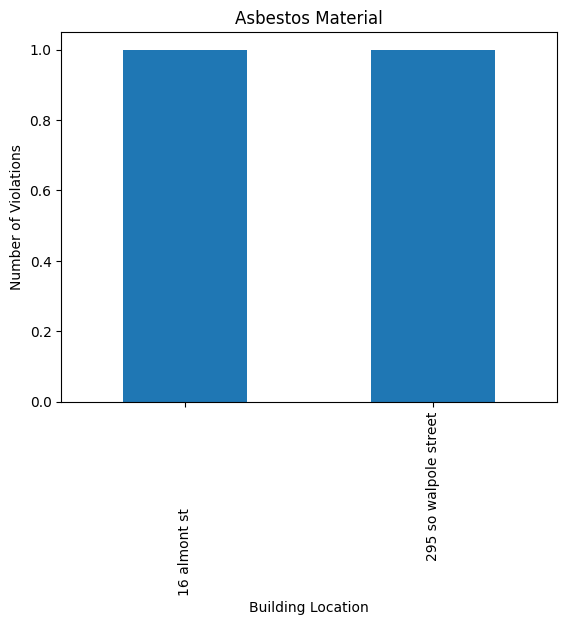

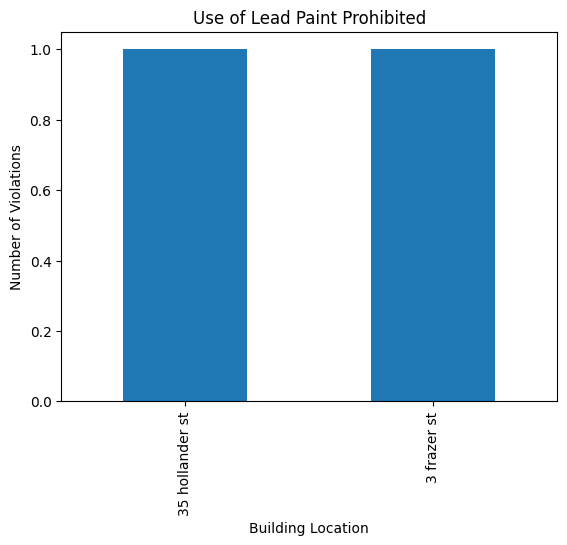

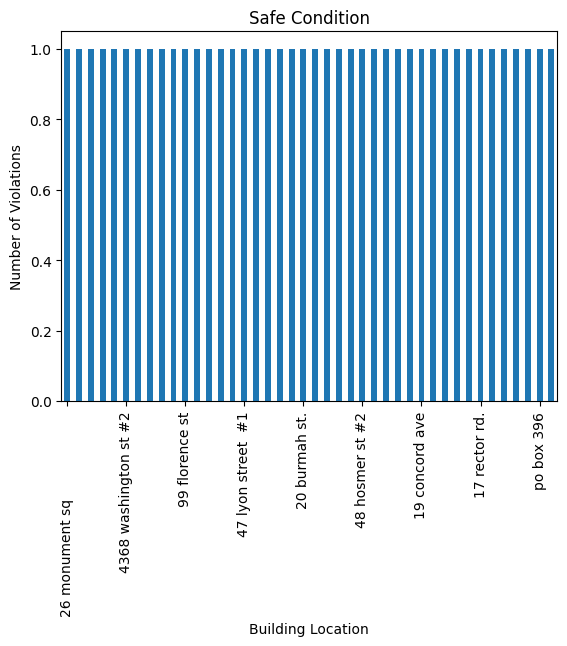

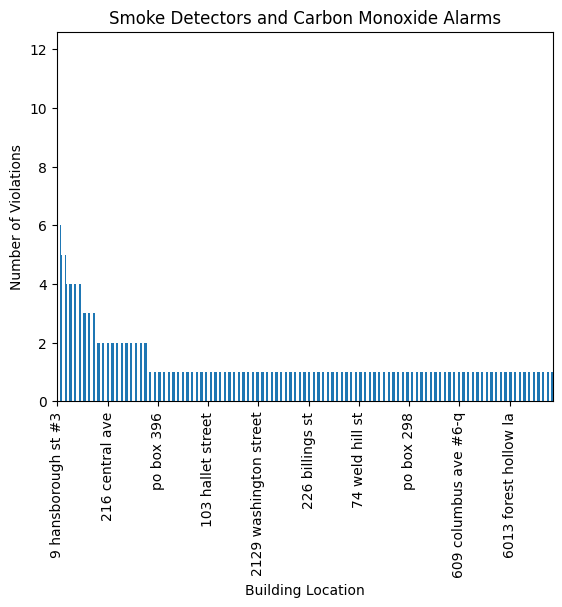

In [11]:
import matplotlib.pyplot as plt
'''Okay to save the data returned by value_counts I am converting it to a df, and to save the df for each violation I am saving it to a dictionary'''
violations_by_building = {} #key: violation name, value: df that contains the location and frequency of the violations

# Go through each of the hazardous conditions violations
for name, code in violations.items():
    # Look at only this violation (code name in the dataset have other values beyond the code # so had to use contains)
    mask = df['code'].str.contains(code, case=False, na=False)
    df_code =  df[mask]
    # Count the number of violations for each address
    count = df_code['contact_addr1'].value_counts()

    #Convert value counts into a new dataframe to save the data
    df_violation = pd.DataFrame(count)
    df_violation = df_violation.reset_index()
    df_violation.columns = ['Location', 'Counts']
    violations_by_building[name] = df_violation
    
    # Plot the count 
    count.plot(kind='bar', rot=0)

    plt.locator_params(axis='x', nbins=10)
    plt.xticks(rotation='vertical')

    plt.title(name)
    plt.xlabel('Building Location')
    plt.ylabel('Number of Violations')
    plt.show()

    # TODO: Save counts and use that to Create a ranking 
  

In [6]:
# # Plot tables for each violation with frequency by building
# for violation, df in violations_by_building.items():
    
#     fig, ax = plt.subplots()
#     ax.axis('off')
#     ax.axis('tight')
#     ax.set_title(violation)
#     ax.set_title(violation, fontsize=8, y=(0.037 *len(df.values)), pad=-14)
#     t= ax.table(cellText=df.values, colWidths = [0.4]*len(df.columns),  colLabels=df.columns, loc='center')
#     t.auto_set_font_size(False) 
#     t.set_fontsize(8)
#     #fig.tight_layout()
#     plt.show()
    
# #TODO: fix formatting issues with tables

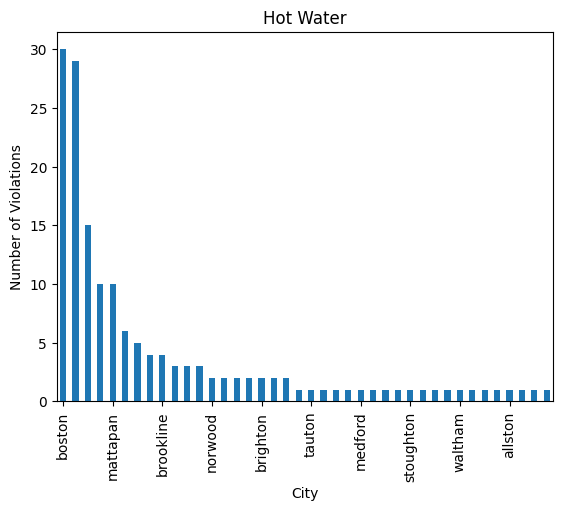

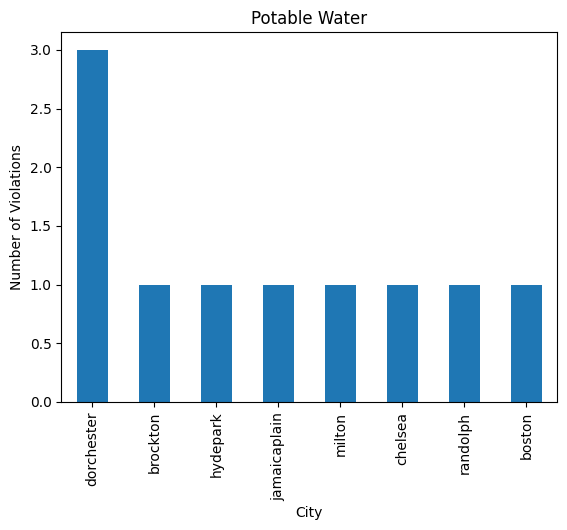

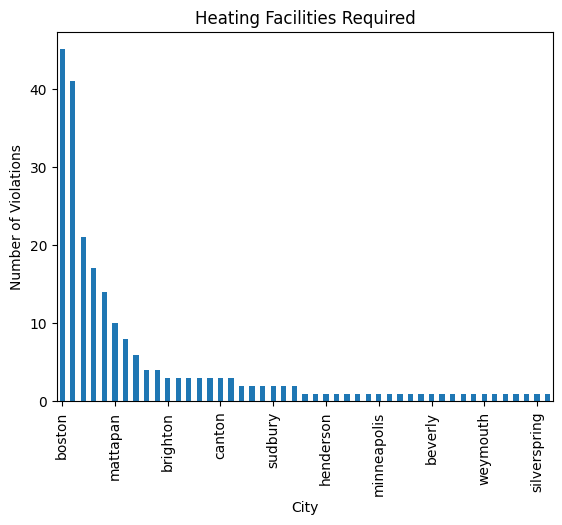

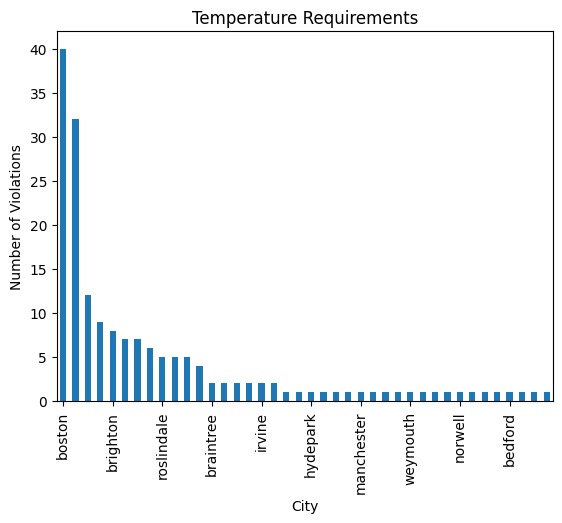

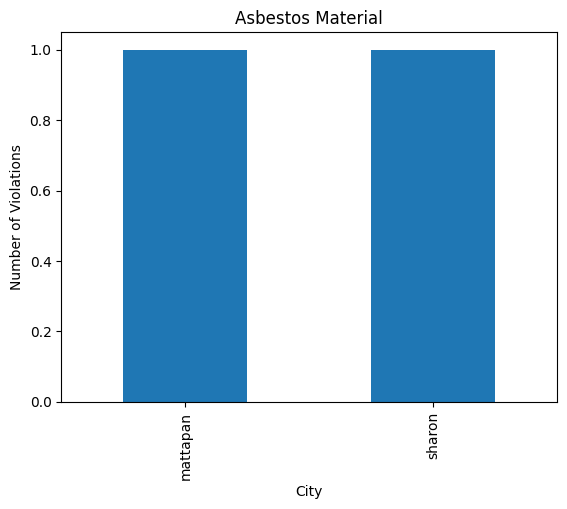

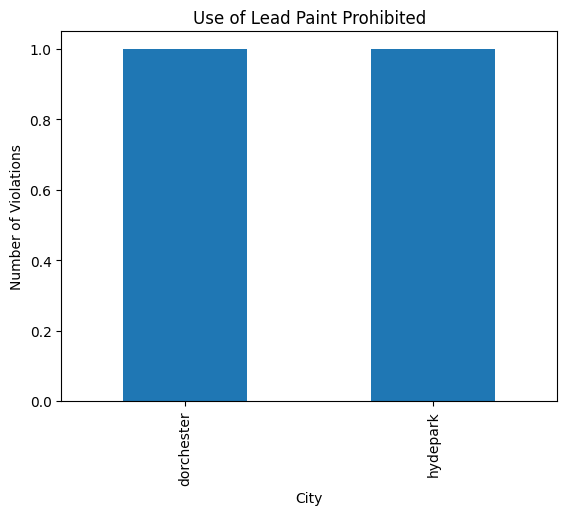

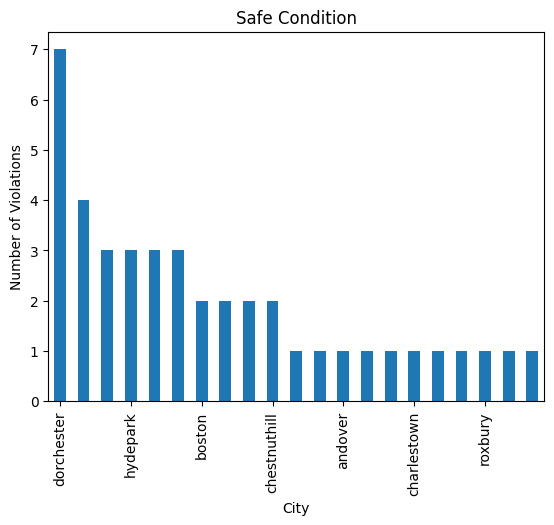

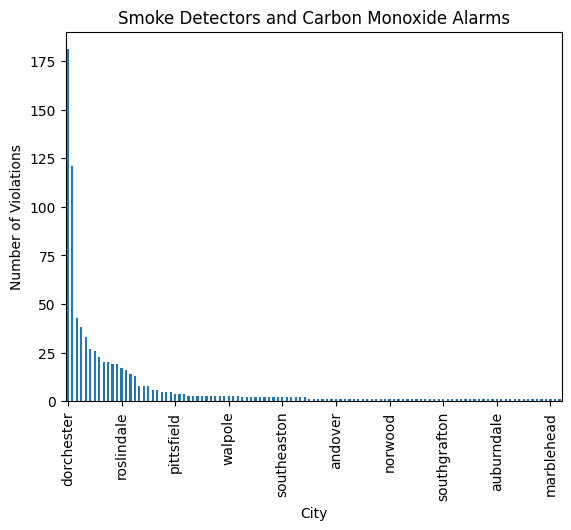

In [12]:
#Use city and create table
import matplotlib.pyplot as plt
'''Okay to save the data returned by value_counts I am converting it to a df, and to save the df for each violation I am saving it to a dictionary'''
violations_by_city = {} #key: violation name, value: df that contains the location and frequency of the violations

# Go through each of the hazardous conditions violations
for name, code in violations.items():
    # Look at only this violation (code name in the dataset have other values beyond the code # so had to use contains)
    mask = df['code'].str.contains(code, case=False, na=False)
    df_code =  df[mask]
    # Count the number of violations for each address
    count = df_code['contact_city'].value_counts()

    #Convert value counts into a new dataframe to save the data
    df_violation = pd.DataFrame(count)
    df_violation = df_violation.reset_index()
    df_violation.columns = ['Location', 'Counts']
    violations_by_city[name] = df_violation
    
    # Plot the count 
    count.plot(kind='bar', rot=0)

    plt.locator_params(axis='x', nbins=10)
    plt.xticks(rotation='vertical')

    plt.title(name)
    plt.xlabel('City')
    plt.ylabel('Number of Violations')
    plt.show()


In [8]:
# Plot tables for each violation with frequency by city
# for violation, df in violations_by_city.items():
    
#     fig, ax = plt.subplots()
#     ax.axis('off')
#     ax.axis('tight')
#     ax.set_title(violation)
#     ax.set_title(violation, fontsize=8, y=(0.037 *len(df.values)), pad=-14)
#     t= ax.table(cellText=df.values, colWidths = [0.4]*len(df.columns),  colLabels=df.columns, loc='center')
#     t.auto_set_font_size(False) 
#     t.set_fontsize(8)
#     #fig.tight_layout()
#     plt.show()
    




In [13]:
# Create df with all violations data 
# Columns: Building Location + each violation
# Rows: Number of violation (for each type of violation) by building 
buildings_df = violations_by_building["Hot Water"]
buildings_df = buildings_df.rename(columns = {'Counts':"Hot Water"})

for violation, df in violations_by_building.items(): 
    df = df.rename(columns = {'Counts':violation})
    if violation != "Hot Water":
        buildings_df = pd.merge(buildings_df, df, how = 'outer', on = 'Location')


# Fill NAN values with 0 so we can get Total
buildings_df = buildings_df.fillna(0)
buildings_df.head(10)

#Create a Total column which sums the number of violations for each Location
buildings_df = buildings_df.assign(Total = lambda x: x.iloc[:,[1,2,3,4,5,6]].sum(axis = 1))

# Also sort so it's in decending order (better for the plot)
buildings_df = buildings_df.sort_values(by = "Total", ascending = False)





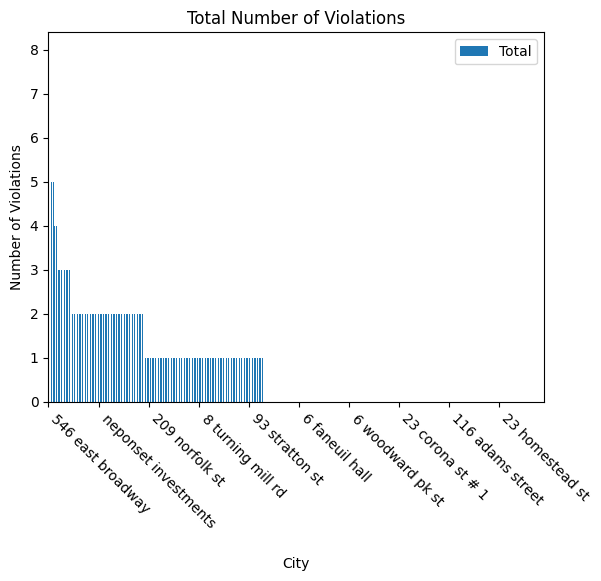

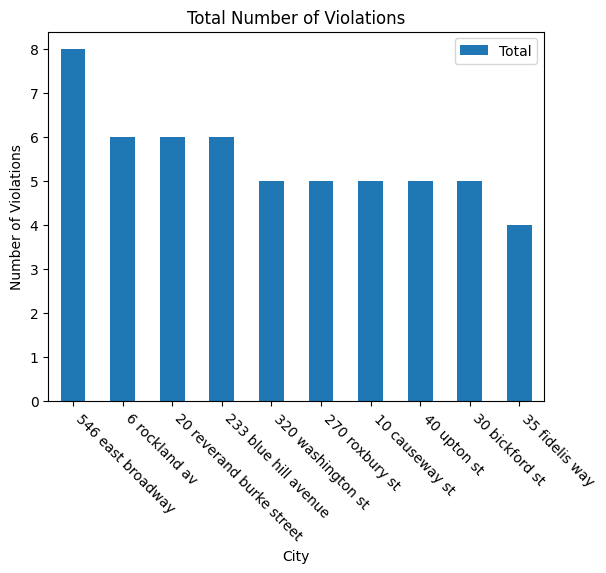

In [14]:
#Plot violations Totals by Buildings

buildings_df[['Location', 'Total']].set_index('Location').plot(kind='bar', rot=0) #set index works but I don't want to have problems later

plt.locator_params(axis='x', nbins = 10)
plt.xticks(rotation=-45, ha = 'left')

plt.title("Total Number of Violations")
plt.xlabel('City')
plt.ylabel('Number of Violations')
plt.show()

#TODO: fix formatting

# AND plot top 10

buildings_df[['Location', 'Total']].iloc[0:10].set_index('Location').plot(kind='bar', rot=0) #set index works but I don't want to have problems later

plt.locator_params(axis='x', nbins = 10)
plt.xticks(rotation=-45, ha = 'left')

plt.title("Total Number of Violations")
plt.xlabel('City')
plt.ylabel('Number of Violations')
plt.show()

In [15]:
# Create df with all violations data 
# Columns: CIty Location + each violation
# Rows: Number of violation (for each type of violation) by city
cities_df = violations_by_city["Hot Water"]
cities_df = cities_df.rename(columns = {'Counts':"Hot Water"})

for violation, df in violations_by_city.items(): 
    df = df.rename(columns = {'Counts':violation})
    if violation != "Hot Water":
        cities_df = pd.merge(cities_df, df, how = 'outer', on = 'Location')


# Fill NAN values with 0 so we can get Total
cities_df = cities_df.fillna(0)

# Create a Total column which sums the number of violations for each Location
cities_df = cities_df.assign(Total = lambda x: x.iloc[:,[1,2,3,4,5,6]].sum(axis = 1))

# Also sort so it's in decending order (better for the plot)
cities_df = cities_df.sort_values(by = "Total", ascending = False)





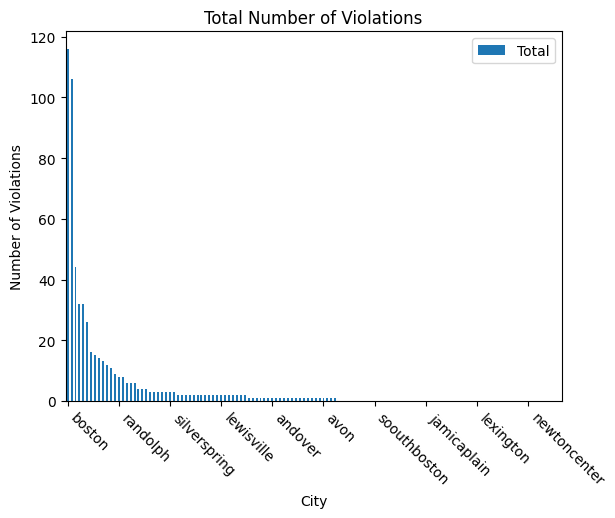

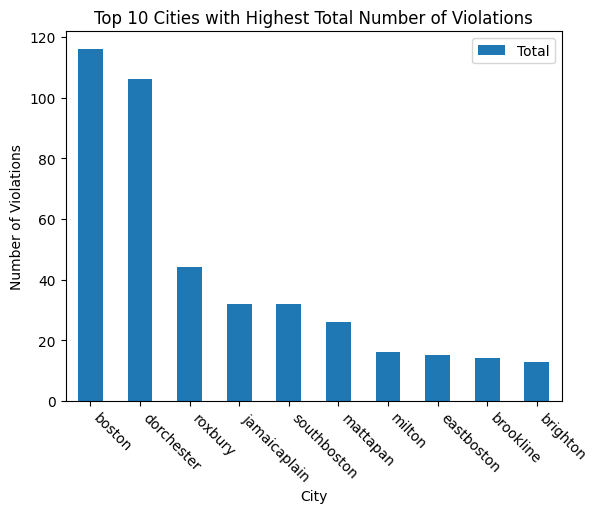

In [16]:
#Plot violation totals by city

cities_df[['Location', 'Total']].set_index('Location').plot(kind='bar', rot=0) #set index works but I don't want to have problems later

plt.locator_params(axis='x', nbins = 10)
plt.xticks(rotation=-45, ha = 'left')

plt.title("Total Number of Violations")
plt.xlabel('City')
plt.ylabel('Number of Violations')
plt.show()

#TODO: fix formatting

# AND plot top 10

cities_df[['Location', 'Total']].iloc[0:10].set_index('Location').plot(kind='bar', rot=0) #set index works but I don't want to have problems later

plt.locator_params(axis='x', nbins = 10)
plt.xticks(rotation=-45, ha = 'left')

plt.title("Top 10 Cities with Highest Total Number of Violations")
plt.xlabel('City')
plt.ylabel('Number of Violations')
plt.show()


In [17]:
buildings_df.head(10)
buildings_df.to_csv('../data/buildings_df.csv')


In [18]:
cities_df.to_csv('../data/cities_df.csv')